In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# gathering data

In [2]:
# twitter archieve: 1st piece
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

# getting tweet image predictions: 2nd piece
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    content = response.content
    file.write(content)   # image-predictions.tsv is now on working directory
    
image_predic_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [3]:
# Reading created JSON from a File line by line
tweets_conunts=[]
with open('tweet_json.txt', 'r') as jfile:
    for line in jfile:
        data = json.loads(line)
        #print(data)
        #break
        tweets_conunts.append({'tweet_id': data['id'], 'retweet_count': data['retweet_count'], 'like_count': data['favorite_count']})
tweets_df = pd.DataFrame(tweets_conunts, columns=['tweet_id', 'retweet_count', 'like_count'])        

# Assessing Data

In [4]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
687,788039637453406209,NaN,NaN,2016-10-17 15:31:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Did... did they pick out that license plate? 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788039637...,12,10,None,None,None,None,None
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. His sweater is too small and he a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597...,10,10,Lou,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
317,834786237630337024,NaN,NaN,2017-02-23 15:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tobi. She is properly fetching her sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834786237...,13,10,Tobi,None,None,None,None


In [5]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`twitter_archive_df` columns:
- **tweet_id**: identifier for each tweet
- **in_reply_to_status_id**: if tweet was reply, this field represents id of original tweet ID
- **in_reply_to_user_id**: if tweet was reply, this field represents author ID of tweet
- **timestamp**: time at which tweet was created
- **source**: the source of posting Tweet e.g. Android, ios, or Web 
- **text**: status update
- **retweeted_status_id**: if original tweet is a retweet, this field has original Tweet’s ID
- **retweeted_status_user_id**: if original tweet is a retweet, this field holds original Tweet’s author ID
- **retweeted_status_timestamp**: retweet time
- **expanded_urls**: URL of re-tweet
- **rating_numerator**: numerator of the rating of a dog
- **rating_denominator**: denominator of the dog rating
- **name**: dog name
- **doggo, floofer, pupper, and puppo**: 4 dog breeds

In [6]:
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [7]:
twitter_archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Rascal       1
Joey         1
Aldrick      1
Poppy        1
Zuzu         1
Name: name, Length: 957, dtype: int64

In [8]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [9]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
twitter_archive_df.retweeted_status_id.isnull().sum() # number of posts(original tweets) which are not retweeted

2175

In [11]:
len(twitter_archive_df[twitter_archive_df.in_reply_to_status_id.isna()])

2278

In [12]:
twitter_archive_df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [13]:
twitter_archive_df.text[420]

"RT @dog_rates: This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https:…"

In [14]:
twitter_archive_df.text[700]

"This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh"

In [15]:
twitter_archive_df.rating_numerator.value_counts() 
# most of values in range[4-12], but sometimes we have very high values e.g. 1776, 960, 666

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive_df[twitter_archive_df.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
int(twitter_archive_df.rating_numerator.mean())

13

In [18]:
twitter_archive_df[twitter_archive_df.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [19]:
twitter_archive_df.iloc[979].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [20]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
image_predic_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,Greater_Swiss_Mountain_dog,0.519428,True,boxer,0.121500,True,Staffordshire_bullterrier,0.114498,True
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True
1958,865359393868664832,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,2,Chesapeake_Bay_retriever,0.832435,True,Labrador_retriever,0.163551,True,Weimaraner,0.002770,True


In [22]:
image_predic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


`image_predic_df` columns:
- **jpg_url**: URL of dog image
- **img_num**: number of dog image predicition (we have 4 dogs!)
- **p1**: result of predicition using Algo.1
- **p1_conf**: predicition ratio using Algo.1
- **p1_dog**: whether the prediction of Algo.1 meet the actual a breed of dog
- -----------------------------------------------------------------------------
similar definations for Algorithms 2 and 3

In [23]:
image_predic_df.tweet_id.isin(twitter_archive_df.tweet_id).sum()

2075

In [24]:
image_predic_df[image_predic_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
tweets_df.sample(10)

,tweet_id,retweet_count,like_count
1831,676146341966438401,744,2077
58,880872448815771648,3989,21734
1971,673213039743795200,929,2410
409,823322678127919110,4637,17437
2179,668994913074286592,254,468
1352,703631701117943808,772,2853
1291,708026248782585858,2166,4799
2160,669393256313184256,83,383
1539,689623661272240129,748,2467
190,855851453814013952,19196,47844


In [26]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   like_count     2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
image_predic_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


`tweets_df`  columns:
- **retweet_count**: number retweeting a certain tweet with 'tweet_id'
- **like_count**: how many times this Tweet has been liked

## Quality issues
`twitter_archive_df` 
* `source` has html tages which is not neccessary and convert its data type to categoty.  
* `timestamp`, and `retweeted_status_timestamp` should be as datetime not object (data type error)
* `in_reply_to_status_id` and `in_reply_to_user_id` should be integer not float  (data type error)
* keep original tweets and remove reweeted ones. 
* based on point above, remove columns of `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` 
* satisfy consistancy between `twitter_archive_df` and `image_predic_df`
* dog `names` with lowercase and single character such as *'a'*
* very high `rating_numerator` e.g. 1776 with respsect to `rating_denominator`==> scaling both

## Tidness issues
`twitter_archive_df` 
* `doggo, floofer, pupper`, and `puppo` should be mergerd in one column
* table of `tweets_df` should be added to `twitter_archive_df`

## Cleaning

### Quality

In [28]:
twitter_archive_clean = twitter_archive_df.copy()

#### `source` has html tages which is not neccessary and convert its data type to categoty

##### Define
remove html tages by recognizing its pattern in source column using [this link](https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python)

##### code

In [29]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<[^<]+?>', '')

In [30]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

##### test

In [31]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

#### data type error
* `timestamp`, and `retweeted_status_timestamp` should be as datetime not object 
* `in_reply_to_status_id` and `in_reply_to_user_id` should be integer not float  

##### Define
convert `timestamp`, and `retweeted_status_timestamp` using pd.to_datetime

##### code

In [33]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('int64')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('int64')

##### test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   int64              
 2   in_reply_to_user_id         2356 non-null   int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### keep original tweets and remove reweeted ones.

##### Define
keep all records at which `retweeted_status_id` is nulls

##### code

In [35]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### test

In [36]:
len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()==False])

0

#### Drop retweeting columns

##### Define
remove columns of `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` 

##### code

In [37]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### satisfy consistancy between `twitter_archive_df` and `image_predic_df`

##### Define
all twitte_id in `image_predic_df` are existed in `twitter_archive_df`, i.e `twitter_archive_df` has more twitter_id = 2356-2075 = 281. So, we need to keep tweets/records in `twitter_archive_df` which are in `image_predic_df`

##### code

In [39]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predic_df.tweet_id)]

##### test

In [40]:
len(twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predic_df.tweet_id)])

0

#### dog `names` with lowercase and single character such as *'a'*

##### Define
replace single letter dog names with nan

##### code

In [41]:
twitter_archive_clean.name[twitter_archive_clean.name.str.match(r'^[a-z]+')] = 'None'

##### test

In [42]:
twitter_archive_clean.name.value_counts()

None       644
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Gunner       1
Dotsy        1
Ulysses      1
River        1
Zuzu         1
Name: name, Length: 914, dtype: int64

####  very high `rating_numerator` e.g. 1776 with respsect to `rating_denominator`

##### Define
* normalize rating_numerator and rating_denominator using [min-max normalization](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)
* correct zero denominator to 1 at index 2335
* use `rating_numerator` and `rating_denominator` to find single rating score and then remove both columns

##### code

In [43]:
twitter_archive_clean.rating_numerator = (twitter_archive_clean.rating_numerator - twitter_archive_clean.rating_numerator.min())/(twitter_archive_clean.rating_numerator.max()-twitter_archive_clean.rating_numerator.min())
twitter_archive_clean.rating_denominator = (twitter_archive_clean.rating_denominator - twitter_archive_clean.rating_denominator.min())/(twitter_archive_clean.rating_denominator.max()-twitter_archive_clean.rating_denominator.min())

In [44]:
twitter_archive_clean.rating_denominator.replace(0, 1.0, inplace=True)

In [45]:
twitter_archive_clean['rating_score'] = (twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator)

In [46]:
twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], index=1, inplace=True)

##### test

In [47]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score
2261,667549055577362432,0,0,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,None,None,None,None,None,0.011824
1460,695051054296211456,0,0,2016-02-04 01:07:39+00:00,Twitter for iPhone,"Meet Brian (pronounced ""Kirk""). He's not amuse...",https://twitter.com/dog_rates/status/695051054...,Brian,None,None,None,None,0.070946
659,791406955684368384,0,0,2016-10-26 22:31:36+00:00,Twitter for iPhone,Say hello to Levi. He's a Madagascan Butterbop...,https://twitter.com/dog_rates/status/791406955...,Levi,None,None,None,None,0.141892
473,816336735214911488,0,0,2017-01-03 17:33:39+00:00,Twitter for iPhone,This is Dudley. He found a flower and now he's...,https://twitter.com/dog_rates/status/816336735...,Dudley,None,None,None,None,0.130068
2111,670442337873600512,0,0,2015-11-28 03:21:24+00:00,Twitter for iPhone,Meet Koda. He's large. Looks very soft. Great ...,https://twitter.com/dog_rates/status/670442337...,Koda,None,None,None,None,0.130068


## Tidness issues
`twitter_archive_df` 
* `doggo, floofer, pupper`, and `puppo` should be mergerd in one column

##### Define
`doggo, floofer, pupper`, and `puppo` should be mergerd in one column with name `breed`

##### code

In [48]:
twitter_archive_clean['breed'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

##### test

In [49]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [50]:
twitter_archive_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating_score,breed
2318,666454714377183233,0,0,2015-11-17 03:16:00+00:00,Twitter for iPhone,I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,Kreggory,0.118243,None
711,784517518371221505,0,0,2016-10-07 22:15:26+00:00,Twitter for iPhone,This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,Frankie,0.130068,None
306,836001077879255040,0,0,2017-02-26 23:52:43+00:00,Twitter for iPhone,Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,None,0.153716,None
1017,746872823977771008,0,0,2016-06-26 01:08:52+00:00,Twitter for iPhone,This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,None,0.130068,None


#### table of `tweets_df` should be added to `twitter_archive_df`

##### Define
all columns of  `tweets_df` is merged with `twitter_archive_df` columns

##### code

In [51]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_df, on='tweet_id', how='left')

##### test

In [52]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating_score,breed,retweet_count,like_count
1130,697270446429966336,0,0,2016-02-10 04:06:43+00:00,Twitter for iPhone,This is Bentley. He got stuck on his 3rd homew...,https://twitter.com/dog_rates/status/697270446...,Bentley,0.118243,None,2087,5131
212,839990271299457024,0,0,2017-03-10 00:04:21+00:00,Twitter for iPhone,Meet Sojourner. His nose is a Fibonacci Spiral...,https://twitter.com/dog_rates/status/839990271...,Sojourner,0.153716,None,2597,14640
1805,669375718304980992,0,0,2015-11-25 04:43:02+00:00,Twitter for iPhone,This is Billl. He's trying to be a ghost but h...,https://twitter.com/dog_rates/status/669375718...,Billl,0.070946,None,792,1425
266,829861396166877184,0,0,2017-02-10 01:15:49+00:00,Twitter for iPhone,This is Mia. She already knows she's a good do...,https://twitter.com/dog_rates/status/829861396...,Mia,0.141892,None,2243,13441
935,715009755312439296,0,0,2016-03-30 02:56:24+00:00,Twitter for iPhone,This is Siba. She's remarkably mobile. Very sl...,https://twitter.com/dog_rates/status/715009755...,Siba,0.141892,None,1392,4550
1781,670040295598354432,0,0,2015-11-27 00:43:49+00:00,Twitter for iPhone,😂😂😂 10/10 for the dog and the owner https://t....,https://twitter.com/dog_rates/status/670040295...,None,0.118243,None,118,801
622,765371061932261376,0,0,2016-08-16 02:14:15+00:00,Twitter for iPhone,This is Louie. He's had a long day. Did a lot ...,https://twitter.com/dog_rates/status/765371061...,Louie,0.130068,pupper,2475,7842
1494,675845657354215424,0,0,2015-12-13 01:12:15+00:00,Twitter for iPhone,This is Pepper. She's not fully comfortable ri...,https://twitter.com/dog_rates/status/675845657...,Pepper,0.118243,pupper,1000,2477
1959,666430724426358785,0,0,2015-11-17 01:40:41+00:00,Twitter for iPhone,Oh boy what a pup! Sunglasses take this one to...,https://twitter.com/dog_rates/status/666430724...,None,0.070946,None,204,330
1155,694356675654983680,670668383499735040,4196983835,2016-02-02 03:08:26+00:00,Twitter for iPhone,This pupper only appears through the hole of a...,https://twitter.com/dog_rates/status/694356675...,None,0.118243,pupper,328,1653


# visualization 

Text(0.5, 1.0, 'Average rating score of dogs over 2015-2017')

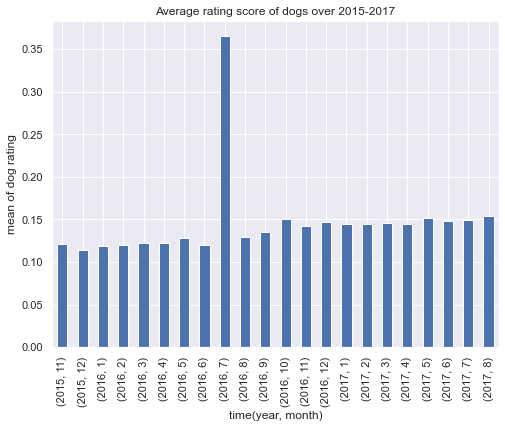

In [53]:
mean_rate_score_year = twitter_archive_clean.groupby([twitter_archive_clean.timestamp.dt.year, twitter_archive_clean.timestamp.dt.month])['rating_score'].mean()
mean_rate_score_year.plot(kind='bar', figsize=(8,6))
plt.xlabel('time(year, month)')
plt.ylabel('mean of dog rating')
plt.title('Average rating score of dogs over 2015-2017')

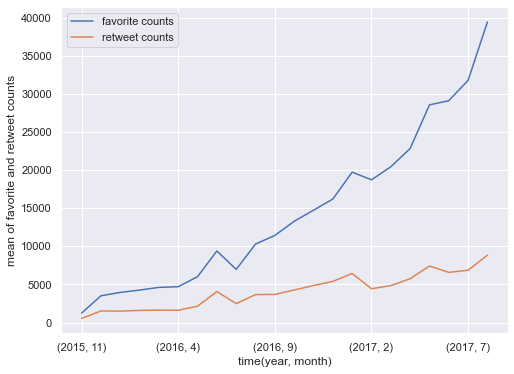

In [59]:
twitter_archive_clean.like_count.groupby([twitter_archive_clean.timestamp.dt.year, twitter_archive_clean.timestamp.dt.month]).mean().plot(figsize=(8,6))
twitter_archive_clean.retweet_count.groupby([twitter_archive_clean.timestamp.dt.year, twitter_archive_clean.timestamp.dt.month]).mean().plot(figsize=(8,6))
plt.xlabel('time(year, month)')
plt.ylabel('mean of favorite and retweet counts')
plt.legend(('favorite counts', 'retweet counts'))
plt.show()

Text(0, 0.5, 'number of tweets')

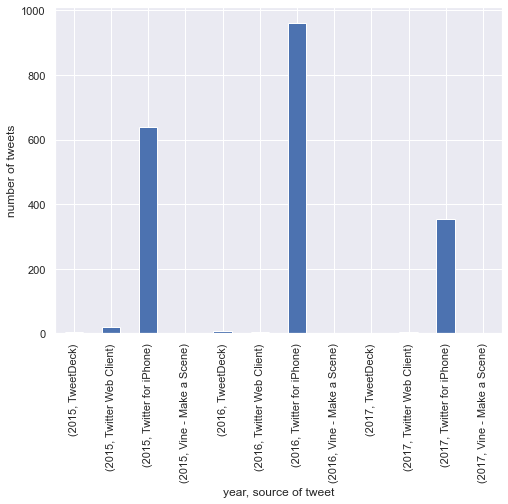

In [55]:
twitter_archive_clean.groupby([twitter_archive_clean.timestamp.dt.year, 'source'])['source'].count().plot(kind='bar', figsize=(8,6))
plt.xlabel('year, source of tweet')
plt.ylabel('number of tweets')

Text(0.5, 1.0, 'top 10 dogs')

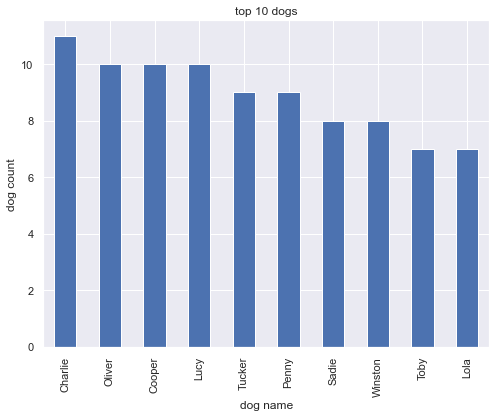

In [56]:
twitter_archive_clean.name.value_counts()[1:11].plot(kind='bar', figsize=(8,6))
plt.xlabel('dog name')
plt.ylabel('dog count')
plt.title('top 10 dogs')